# Twitter账户@WeRateDogs犬只分析报告

## 收集

#### 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth',150)

#### twitter_archive_enhanced 保存为DataFrame。

In [2]:
df_raw = pd.read_csv('twitter-archive-enhanced.txt',sep=',',header=0)

#### image-prediction.tsv 转换为DataFrame

In [3]:
import requests
url ="https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd002/image-predictions.tsv"
response = requests.get(url)
with open('image-prediction.tsv','wb') as file:
    file.write(response.content)
df_img = pd.read_csv("image-prediction.tsv",sep='\t',header=0)

#### tweet_json.txt 转换为DataFrame格式
+ 出现错误：'ValueError: Trailing data'
+ 解决方法：添加参数line=True
+ 参考：https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas


In [4]:
df_supl = pd.read_json('tweet_json.txt',lines=True)
df_supl = df_supl[['id','favorite_count','retweet_count']]

## 评估

### 针对twitter-archive-enhanced.csv文件的评估

In [5]:
df_raw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…",8.726576e+17,154767397.0,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657584259551233/photo/1,14,10,None,None,None,None,None
50,882627270321602560,NaN,NaN,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882627270321602560/photo/1,13,10,Stanley,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Percy. He fell asleep at the wheel. Irresponsible af. 7/10 absolute menace on the roadway https://t.co/QHbvtvaw8E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589599014916/photo/1,7,10,Percy,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12,10,None,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I just wanna talk https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788403113984/photo/1,13,10,Luna,None,None,None,None


In [6]:
df_raw.shape

(2356, 17)

In [7]:
df_raw.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 共有17个特征，2356条记录。

+ tweet_id，是每个tweet的唯一标识
+ 'in_reply_to_status_id',Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
+ 'in_reply_to_user_id', Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.
+ 'timestamp',
+ 'source',Utility used to post the Tweet, as an HTML-formatted string. 
+ 'text',The actual UTF-8 text of the status update.tweet中的文本内容
+ 'retweeted_status_id',
+ 'retweeted_status_user_id',
+ 'retweeted_status_timestamp', 
+ 'expanded_urls',
+ 'rating_numerator',评分的分子部分，一般大于10，也可能存在小于10的情况。
+ 'rating_denominator',评分的分母部分，一般为10
+ 'name',来自tweet的文本内容，判断是犬只的名字。
+ 'doggo',一种犬只的等级，等级一共有四种。
+ 'floofer',一种犬只的等级，等级一共有四种。
+ 'pupper',一种犬只的等级，等级一共有四种。
+ 'puppo'，一种犬只的等级，等级一共有四种。

参考：
+ https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_raw.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [10]:
df_raw.duplicated(subset=['tweet_id','name']).sum()

0

In [11]:
df_raw['name'].value_counts().nlargest(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Buddy        7
Toby         7
Daisy        7
an           7
Leo          6
Milo         6
Name: name, dtype: int64

In [12]:
df_raw[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [13]:
df_raw.rating_numerator.value_counts().nlargest(20)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
0        2
15       2
75       2
80       1
20       1
Name: rating_numerator, dtype: int64

In [14]:
df_raw.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
for i in df_raw.text.values[:5]:
    display(i) 

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f'

In [16]:
df_raw.query("name == 'a'").text.values[:5]

array(['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
       'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
       'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
       'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
       'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R'],
      dtype=object)

In [17]:
df_raw[df_raw.rating_numerator==45].text.values

array(['From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'],
      dtype=object)

In [18]:
df_raw[df_raw.rating_numerator==1776].text.values

array(["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"],
      dtype=object)

In [19]:
df_raw[df_raw.rating_numerator==0].text.values[:]

array(["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"],
      dtype=object)

In [20]:
df_raw[df_raw.rating_numerator==420].text.values[:1]

array(['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'],
      dtype=object)

In [21]:
df_raw[df_raw.rating_numerator==20].text.values[:1]

array(["I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"],
      dtype=object)

In [22]:
df_raw[df_raw.rating_denominator==170].text.values

array(['Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'],
      dtype=object)

In [23]:
df_raw[df_raw.retweeted_status_id.notnull()].shape[0]

181

In [24]:
df_raw[(df_raw.rating_numerator>20)&(df_raw.rating_denominator>10)].shape

(13, 17)

### 针对image-prediction.tsv文件的评估

In [25]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
1958,865359393868664832,https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg,2,Chesapeake_Bay_retriever,0.832435,True,Labrador_retriever,0.163551,True,Weimaraner,0.002770,True
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/684538367950872576/pu/img/kTKOkSU45BS-fpq8.jpg,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False


In [26]:
df_img.shape

(2075, 12)

In [27]:
df_img.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### 共有12个特征，2075条记录。

+ tweet_id，是每个tweet的唯一标识
+ jpg_url 是预测的图像资源链接
+ img_num 最可信的预测结果对应的图像编号.
+ p1 是算法对推特中图片的一号预测 
+ p1_conf 是算法的一号预测的可信度
+ p1_dog 是一号预测该图片是否属于“犬”（有可能是其他物种，比如熊、马等）,True表示图片属于犬类
+ p2 是算法对推特中图片预测的第二种可能性
+ p2_conf 是算法的二号预测的可信度
+ p2_dog 是二号预测该图片是否属于“犬”.
+ p3 图片预测的第三种可能性
+ p3_conf 三号预测的可信度
+ p3_dog 三号预测的图片是否属于犬。

参考：
+ udactiy

In [28]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
df_img.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [31]:
df_img.duplicated(subset=['tweet_id'],keep="first").sum()

0

In [32]:
df_img[(df_img.p1_conf>=df_img.p2_conf)&(df_img.p2_conf>=df_img.p3_conf)|(df_img.p1_conf>=df_img.p3_conf)].shape

(2075, 12)

In [33]:
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
len(df_img.query("img_num >1"))

295

In [35]:
df_img.p1.str.istitle().sum()

402

In [36]:
df_img.p1.str.islower().sum()

1135

In [37]:
df_img[df_img.p1.str.istitle()].head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.58233,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True


In [38]:
df_img[~((df_img.p1.str.istitle())|(df_img.p1.str.islower()))].head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### 针对tweet_json.txt文件的评估

In [39]:
df_supl.sample(5)

,id,favorite_count,retweet_count
2351,666020888022790149,2528,530
997,747933425676525569,7266,2881
1532,689905486972461056,2644,785
1307,707021089608753152,4424,1535
455,817908911860748288,5337,902


In [40]:
df_supl.shape

(2352, 3)

In [41]:
df_supl.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

#### 共有3个特征，2352条记录。

+ favorite_count，tweet被点赞的次数，反映阅读者对此tweet内容是否喜欢。
+ retweet_count，tweet被转发的次数，反映阅读者对此tweet内容喜欢的程度。
+ id,tweet的唯一标识


In [42]:
df_supl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [43]:
df_supl[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,2352.000000,2352.000000
mean,8109.198980,3134.932398
std,11980.795669,5237.846296
min,0.000000,0.000000
25%,1417.000000,618.000000
50%,3596.500000,1456.500000
75%,10118.000000,3628.750000
max,132318.000000,79116.000000


### 评估总结：

#### 质量

#####  **twitter-archive-enhanced数据**
+ 'in_reply_to_status_id','in_reply_to_user_id',,'retweeted_status_timestamp','expanded_urls'，'retweeted_status_timestamp',,'source'这些列不需要。
+ 只保留'retweeted_status_user_id'，,'retweeted_status_id'为null的记录，因为这两个列非空的相关的内容都是转发，会与原内容重复。
+ 有些犬没有名字，数值是None,'an','the'或者'a'.而不是null
+ 有些犬没有等级分类。数值是None,不是null
+ 'rating_numerator','rating_denominator',最大值分别为1776和170，分别大于均值13和10
+ timestamp的类型是object，
+ tweet_id的类型是int64

##### **image-prediction数据**
+ p1，犬只的类型，存在大小写不一致的情况。
+ 由于p1列和相关预测分数表明犬只最可能的种类，因此不需要p2,p2_conf,p3,p3_conf,p2_dog,p3_dog这些列。
+ img_num 表示对应的图片的编号，不需要这个列。

##### **tweet_json数据**
+ id，应该为tweet_id,与其他两个数据集相应的列保持一致。


#### 整洁度
+ df_raw,df_img，df_supl的observation都是tweet_id
+ df_raw中犬只的等级分布在四个列中。
+ df_img中使用'p1','p1_dog'两个列表述犬只的种类


## 清理

### 清理数据质量问题

#### 备份三个数据集

In [44]:
df_raw_clean = df_raw.copy()
df_img_clean = df_img.copy()
df_supl_clean = df_supl.copy()

#### 清理不需要的特征

##### 定义
+ 从df_raw中过滤掉'retweeted_status_id','retweeted_status_user_id'非空的记录
+ 从df_raw删除下列不需要的列： 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'， 'timestamp'，'retweeted_status_timestamp','source'

+ 从df_img中删除p2,p2_conf,p3,p3_conf,p2_dog,p3_dog.img_num这些列

##### 代码

In [45]:
df_raw_clean = df_raw_clean[(df_raw_clean.retweeted_status_id.isnull())|(df_raw_clean.retweeted_status_user_id.isnull())]
df_raw_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp','expanded_urls','retweeted_status_timestamp','source'],inplace=True)
df_img_clean.drop(columns=['p2','p2_conf','p3','p3_conf','p2_dog','p3_dog','img_num'],inplace=True)
df_supl_clean = df_supl_clean[['id','favorite_count','retweet_count']]


##### 测试

In [46]:
df_raw_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [47]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

In [48]:
df_supl_clean.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

#### 清理空值

##### 定义
+ replace方法对df_raw中的'name'中的'a','an','the'替换为"None"
+ 使用dropna方法清理空值以及相应的记录。

##### 代码

In [49]:
df_raw_clean.name.replace(['a','an','the'],"None",inplace=True)
df_raw_clean.dropna(axis='index',inplace=True)

##### 测试

In [50]:
df_raw_clean.name.isnull().sum()

0

#### 清理数据类型

##### 定义
+ 使用astype或者to_datatime方法将df_raw中的'timestamp'的数据类型改为Datetime类型
+ 使用astype方法将df_raw,df_img中的'tweet_id'，以及df_supl中的'id'的数据类型改为str类型

##### 代码

In [51]:
df_raw_clean.timestamp = pd.to_datetime(df_raw_clean.timestamp)
df_raw_clean.tweet_id = df_raw_clean.tweet_id.astype(str)
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)
df_supl_clean.id = df_supl_clean.id.astype(str)

##### 测试

In [52]:
df_raw_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [53]:
df_img_clean.dtypes

tweet_id     object
jpg_url      object
p1           object
p1_conf     float64
p1_dog         bool
dtype: object

In [54]:
df_supl_clean.dtypes

id                object
favorite_count     int64
retweet_count      int64
dtype: object

#### 清理一致性问题

##### 定义
+ 使用str.title()将df_img中'p1'中犬的类型的格式进行统一化处理。

##### 代码

In [55]:
df_img_clean.p1=df_img_clean.p1.str.title()

##### 测试

In [56]:
df_img_clean.p1.str.istitle().shape[0]== df_img_clean.shape[0]

True

#### 清理异常值问题

##### 定义

+ 过滤掉df_raw中'rating_numerator'以及'rating_denominator'中分子大于20，分母大于10的记录。

##### 代码

In [57]:
df_raw_clean = df_raw_clean[~((df_raw_clean.rating_numerator>20)|(df_raw_clean.rating_denominator>10))]

##### 测试

In [58]:
df_raw_clean.describe()

,rating_numerator,rating_denominator
count,2146.000000,2146.000000
mean,10.617428,9.996272
std,2.208577,0.172693
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,17.000000,10.000000


In [59]:
df_raw_clean[df_raw_clean.rating_denominator==0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 清理数据整洁度

#### 清理多个列表示一个特征的问题

##### 定义
+ 过滤掉df_img文件中'p1_dog'为False的记录
+ 创建df_temp，是df_raw的切片，包含'doggo','floofer','pupper','puppo'四个列，并添加'stage'列
+ 使用apply方法将df_raw中'doggo','floofer','pupper','puppo'四个列合并为'stage',
+ 使用drop方法，删除df_raw中的'doggo','floofer','pupper','puppo'四个列，并将df_temp中的'stage'合并到df_raw中。

##### 代码

In [60]:
df_img_clean = df_img_clean[df_img_clean.p1_dog==True]

In [61]:
df_temp= df_raw_clean.loc[:,['doggo','floofer','pupper','puppo']]
df_temp["stage"]=np.nan
stage_list = df_temp.columns[:-1].tolist()
def to_stage(df):
    for c in stage_list:
        if df[c] == c:
            return c
    return "None"
df_temp["stage"]=df_temp.apply(to_stage,axis=1)
df_temp.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
df_raw_clean = pd.concat([df_raw_clean,df_temp],axis=1)
df_raw_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### 测试

In [62]:
df_img_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [63]:
df_raw_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [64]:
df_raw_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
284,838921590096166913,2017-03-07 01:17:48,This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inevitable brain freeze https://t.co/oXVu9pNZZv,13,10,Arlo,None
350,831552930092285952,2017-02-14 17:17:22,This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse,13,10,Dutch,None
2062,671163268581498880,2015-11-30 03:06:07,Pack of horned dogs here. Very team-oriented bunch. All have weird laughs. Bond between them strong. 8/10 for all https://t.co/U7DQQdZ0mX,8,10,None,None
1902,674644256330530816,2015-12-09 17:38:19,When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp,11,10,None,None
1357,703407252292673536,2016-02-27 02:32:12,This pupper doesn't understand gates. 10/10 so close https://t.co/GUbFF4o6dZ,10,10,None,pupper


#### 清理多个数据表描述统一个observation的问题

##### 定义
+ 使用drop方法清理df_img中不必要的列:'p1_dog','p1_conf'
+ 使用rename方法，将df_supl中的'id'改为'tweet_id'
+ 使用merge函数，将df_raw，df_supl,df_img,三个数据集，按照'tweed_id'进行合并，df_raw与df_supl进行左连接，然后与df_img进行内连接。
+ 使用rename方法，将合并后数据集中的'p1'改为'dog_type'

##### 代码

In [65]:
df_img_clean.drop(columns=['p1_dog','p1_conf'],inplace=True)
df_supl_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [66]:
df_archive_master = pd.merge(df_raw_clean,df_supl_clean,on='tweet_id',how='left')
df_archive_master = pd.merge(df_archive_master,df_img_clean,on='tweet_id',how='inner')

In [67]:
df_archive_master.rename(columns={'p1':'dog_type'},inplace=True)

##### 测试

In [68]:
df_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,dog_type
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",13,10,Tilly,None,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",12,10,Franklin,None,41016,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,13,10,None,None,20548,3240,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_Retriever
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,13,10,Jax,None,12053,2142,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller


In [69]:
df_archive_master.tail(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,dog_type
1455,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,None,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher
1456,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,None,None,309,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback
1457,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,None,None,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd
1458,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,None,None,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
1459,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,None,None,2528,530,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel


In [70]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 11 columns):
tweet_id              1460 non-null object
timestamp             1460 non-null datetime64[ns]
text                  1460 non-null object
rating_numerator      1460 non-null int64
rating_denominator    1460 non-null int64
name                  1460 non-null object
stage                 1460 non-null object
favorite_count        1460 non-null int64
retweet_count         1460 non-null int64
jpg_url               1460 non-null object
dog_type              1460 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 136.9+ KB


### 存储清理后的主数据集

In [71]:
# 将清理后的主数据集保存为 csv 文件
df_archive_master.to_csv('twitter_archive_master.csv',encoding='utf-8')

## 分析和可视化

#### 读取存储数据集

In [72]:
df_visual= pd.read_csv('twitter_archive_master.csv',header=0,index_col =0)

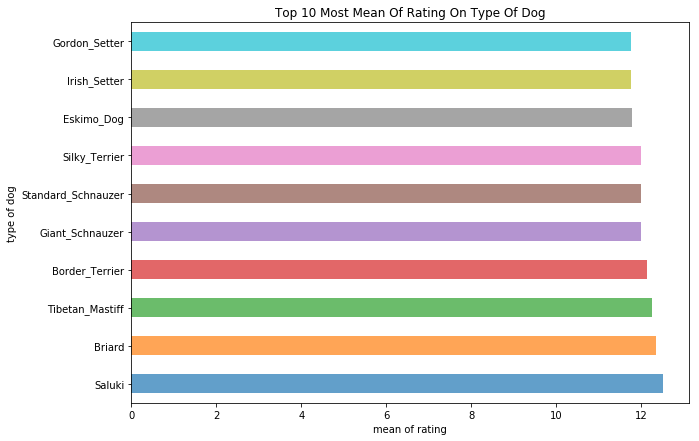

In [73]:
plt.figure(figsize=(10,7))
dog_type_rating_mean = df_visual.groupby('dog_type')['rating_numerator'].mean().sort_values(ascending=False)
dog_type_rating_mean.iloc[:10].plot(kind ="barh",alpha=0.7)
plt.xlabel('mean of rating')
plt.ylabel("type of dog")
plt.title("top 10 most mean of rating on type of dog".title())
plt.show()

In [74]:
dog_type_rating_mean.iloc[:10]

dog_type
Saluki                12.500000
Briard                12.333333
Tibetan_Mastiff       12.250000
Border_Terrier        12.142857
Giant_Schnauzer       12.000000
Standard_Schnauzer    12.000000
Silky_Terrier         12.000000
Eskimo_Dog            11.777778
Irish_Setter          11.750000
Gordon_Setter         11.750000
Name: rating_numerator, dtype: float64

>观点：
+ "Saluki"类犬平均得分最高,平均得分12.50
+ 其次是'Briand'和"Tibetan_Mastiff"类犬.分别是12.33和12.25

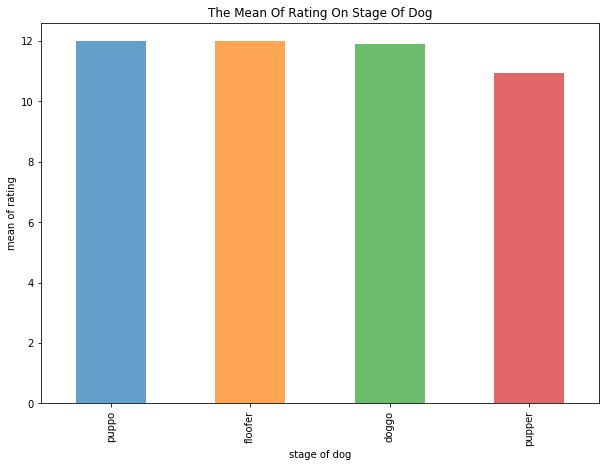

In [75]:
plt.figure(figsize=(10,7))
stage_rating_mean = df_visual[df_visual.stage!='None'].groupby('stage')['rating_numerator'].mean().sort_values(ascending=False)
stage_rating_mean.plot(kind ="bar",alpha=0.7)
plt.ylabel('mean of rating')
plt.xlabel("stage of dog")
plt.title("The mean of rating on stage of dog".title())
plt.show()

In [76]:
stage_rating_mean

stage
puppo      12.000000
floofer    12.000000
doggo      11.896552
pupper     10.951049
Name: rating_numerator, dtype: float64

>观点：
+ 地位为'puppp'的犬平均得分最高,平均得分12.00
+ 地位为'pupper'的犬平均得分最低，平均得分为 10.95

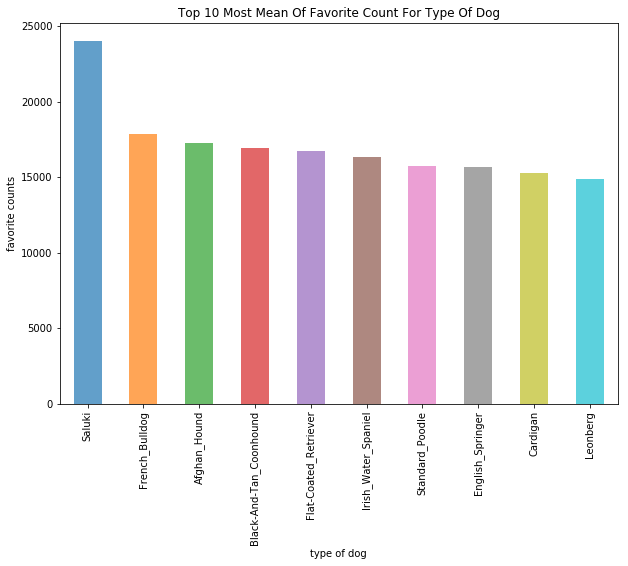

In [77]:
plt.figure(figsize=(10,7))
dog_type_favorite_mean = df_visual[df_visual.dog_type!='None'].groupby('dog_type')['favorite_count'].mean().sort_values(ascending=False)
dog_type_favorite_mean.iloc[:10].plot(kind ="bar",alpha=0.7)
plt.xlabel('type of dog')
plt.ylabel("favorite counts")
plt.title("Top 10 most mean of favorite count for type of dog".title())
plt.show()

In [78]:
dog_type_favorite_mean.iloc[:10]

dog_type
Saluki                     23996.250000
French_Bulldog             17854.769231
Afghan_Hound               17250.666667
Black-And-Tan_Coonhound    16952.500000
Flat-Coated_Retriever      16731.625000
Irish_Water_Spaniel        16335.333333
Standard_Poodle            15732.142857
English_Springer           15631.222222
Cardigan                   15251.705882
Leonberg                   14870.000000
Name: favorite_count, dtype: float64

>观点：
+ "Saluki"类犬平均点赞数最高,平均为23996次
+ 其次是"French_Bulldog "和'Afghan_Hound'类犬.分别是17855和17251次

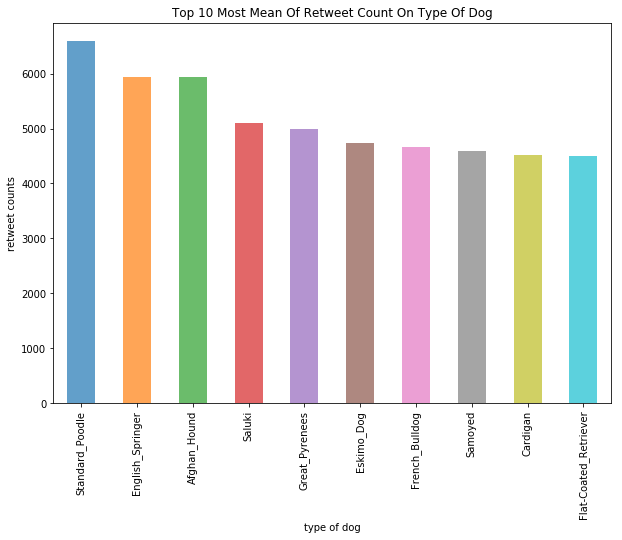

In [79]:
plt.figure(figsize=(10,7))
dog_type_retweet_mean = df_visual[df_visual.dog_type!='None'].groupby('dog_type')['retweet_count'].mean().sort_values(ascending=False)
dog_type_retweet_mean.iloc[:10].plot(kind ="bar",alpha=0.7)
plt.xlabel("type of dog")
plt.ylabel('retweet counts')
plt.title("Top 10 most mean of retweet count on type of dog".title())
plt.show()

In [80]:
dog_type_retweet_mean.iloc[:10]

dog_type
Standard_Poodle          6602.142857
English_Springer         5948.666667
Afghan_Hound             5946.000000
Saluki                   5103.250000
Great_Pyrenees           4987.153846
Eskimo_Dog               4742.444444
French_Bulldog           4656.384615
Samoyed                  4597.425000
Cardigan                 4513.647059
Flat-Coated_Retriever    4500.125000
Name: retweet_count, dtype: float64

>观点：
+ 'Standard_Poodle'类犬平均转发数最高,平均为6602次
+ 其次是'English_Springer'和"Afghan_Hound"类犬.分别是5949和5946次
+ 'Saluki'类犬虽然平均点赞次数最多，但是转发次数只能屈居第四位。

### 总结和展望
+ 本报告主要着眼与数据集关于犬只评分，以及相关点赞和转发等特征的分析和可视化。发掘该@WeRateDog账户中，评分较高的犬只类型，犬只地位，以及点赞数较高，转发数较高的相关犬只类型。通过可视化分析，我们发现：
    1. "Saluki"类犬平均得分最高,平均得分12.50，其次是"Tibetan_Mastiff"和'Briand'类犬.分别是12.40和12.33，
    2. 地位为'puppp'的犬平均得分最高,平均得分12.10，地位为'pupper'的犬平均得分最低，平均得分为 10.78,
    3. "Saluki"类犬平均点赞数最高,平均为23996次,其次是"French_Bulldog "和'Black-And-Tan_Coonhound '类犬.分别是17854和16952次
    4. 'Standard_Poodle'类犬平均转发数最高,平均为11033次,其次是"Afghan_Hound"和'English_Springer'类犬.分别是7127和5568次,'Saluki'类犬虽然平均点赞次数最多，但是转发次数只能屈居第五位。
    
+ 当然，以上的结论存在局限性，首先数据集不够大，只有二千余条数据；其次，收集数据主要是从2014年至2017年，不能反映现在的实际情况；第三，数据的特征不足，缺少点赞或者转发账户信息，同时tweet文本信息过于程式化，没有收集到评论信息，并且没有对这些信息进行情感分析。这些都是需要通过加强相关数据的收集，以及借助相关模型和工具来进一步解决的。
+ 局限性还体现在本报告的关注点上，没有关注twitter账户本身的特征，比如与点赞数和转发数相关的特征，评分的相关的特征分析等等。这些都是需要后续来进行研究和解决的内容。